## Traitement d'un fichier audio

* j'utilise le package librosa pour extraire les le signal audio

In [ ]:
# installation de librosa
!pip install librosa==0.10.0.post2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.0/253.0 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: pooch
    Found existing installation: pooch 1.8.2
    Uninstalling pooch-1.8.2:
      Successfully uninstalled pooch-1.8.2
  Attempting uninstall: librosa
    Found existing installation: librosa 0.10.2.post1
    Uninstalling librosa-0.10.2.post1:
      Successfully uninstalled librosa-0.10.2.post1


In [20]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
audio = "/content/drive/MyDrive/signal/Pierre.mp3"

signal, sr = librosa.load(audio) # lecture du signal audio

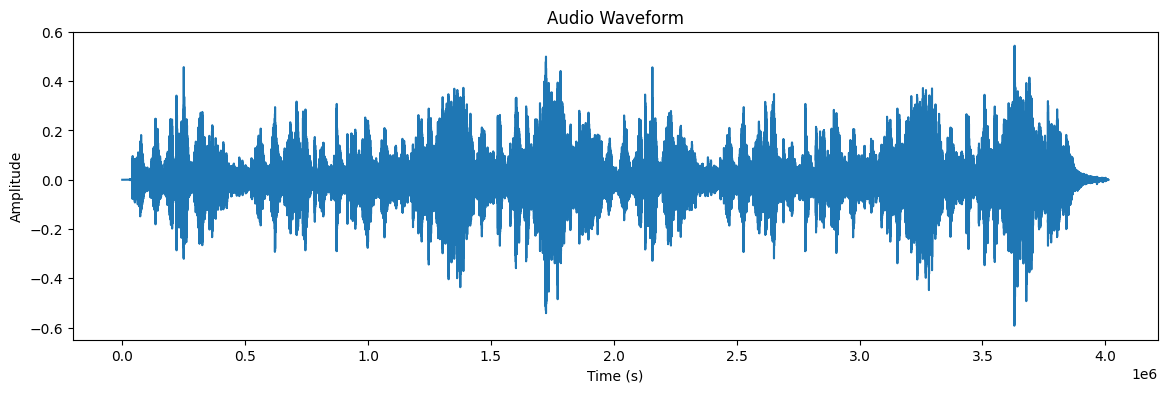

In [23]:
plt.figure(figsize=(14, 4))
#librosa.display.waveshow(y, sr=sr)
plt.plot(signal)
plt.title('Audio Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

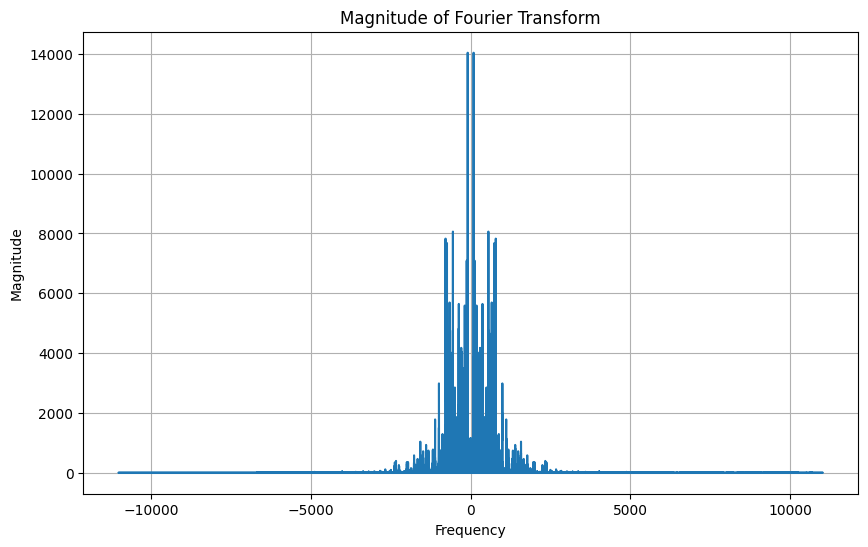

In [24]:
# transformer de Fourier du signal
ff = np.fft.fft(signal)
ff_freq = np.fft.fftfreq(len(signal), d=1/sr)


plt.figure(figsize=(10, 6))
plt.plot(ff_freq, np.abs(ff))
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.title('Magnitude of Fourier Transform')
plt.grid(True)
plt.show()

In [25]:
def fourier_series(signal,sr, N):
    T = len(np.signal)/sr # Period du signal
    t = np.linspace(0, T, len(signal))

    a0 = (2 / T) * np.trapz(signal, t)
    an = np.zeros(N)
    bn = np.zeros(N)
    for n in range(1, N + 1):
        an[n-1] = (2 / T) * np.trapz(signal * np.cos(n * t), t)
        bn[n-1] = (2 / T) * np.trapz(signal * np.sin(n * t), t)
    reconstructed_signal = a0 / 2
    for n in range(1, N + 1):
        reconstructed_signal += an[n-1] * np.cos(n * t) + bn[n-1] * np.sin(n * t)
    return reconstructed_signal, a0, an, bn

In [26]:

import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact

In [ ]:
N_slider = widgets.IntSlider(value=5, min=1, max=50, step=1, description='Harmonics (N):')

# Interactive function for Fourier series decomposition
def plot_fourier_series(N,signal, t):
    reconstructed_signal, a0, an, bn = fourier_series(t, signal, N)
    plt.figure(figsize=(10, 5))
    plt.plot(t, signal, label='Original Signal', color='blue', alpha=0.5)
    plt.plot(t, reconstructed_signal, label=f'Fourier Series (N={N})', color='red')
    plt.title(f'Fourier Series Decomposition of signal Data with N={N}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()
    plt.show()

interact(plot_fourier_series, N=N_slider, signal=signal/1000, t=np.linspace(0,len(signal/1000)/sr, len(signal)))

Buffered data was truncated after reaching the output size limit.